# Kepler-9
Este notebook analiza el sistema planetario **Kepler-9**, utilizando curvas de luz del telescopio Kepler y principios de física orbital. Se estiman radios, semiejes mayores y se compara con datos reales. También se determina la zona habitable y se visualiza la arquitectura orbital del sistema.

## 1. Carga de librerías
Importamos las herramientas necesarias para análisis astronómico, visualización y manipulación de datos.

In [2]:
!pip install lightkurve
!pip install pandas

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.6/199.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 74.9 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=ab9c433e13e2fce98b4478be63e96800153174acc0cd2c6923abd856456c60c1
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe5459f0333c9b
  Created wheel for memoization: 

In [3]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


## 2. Constantes físicas
Definimos las constantes necesarias para los cálculos físicos.

In [4]:
# --- Constantes físicas ---
G = 6.67430e-11              # m^3/kg/s^2
M_sun = 1.98847e30           # kg
R_sun = 695700e3             # m
R_earth = 6378137.0          # m
UA = 149597870700            # m
dy2sec = 86400

## 3. Parámetros estelares
Información básica de la estrella Kepler-9.

In [5]:
# --- Datos estrella Kepler-9 ---
Star = "Kepler-9"
M_star = 1.07 * M_sun
R_star = 1.02 * R_sun
L_star = 1.0
HZ_inner = np.sqrt(L_star / 1.1)
HZ_outer = np.sqrt(L_star / 0.53)

## 4. Parámetros reales de los planetas Kepler-9 b y c
Datos reportados por la NASA Exoplanet Archive.

In [6]:
# --- Datos planetas reales (NASA) ---
Pb_real, ab_real, Rb_real = 19.2242, 0.143, 9.4
Pc_real, ac_real, Rc_real = 38.9100, 0.225, 9.2

## 5. Descarga y limpieza de curvas de luz
Obtenemos los datos fotométricos de Kepler y los preprocesamos.

In [7]:
# --- Cargar y limpiar curva de luz ---
search = lk.search_lightcurve(Star, author='Kepler', cadence='long')
lc = search.download_all().stitch().flatten(window_length=901).remove_outliers()

## 6. Ajuste de tránsito para Kepler-9 b

In [8]:
# --- Modelo visual con periodo fijo: planeta b ---
P_b = Pb_real
epoch_b = 134.0
folded_b = lc.fold(P_b, epoch_b)
depth_b = folded_b.flux.min()
rpb_m = np.sqrt(1 - depth_b) * R_star
rpb_earth = rpb_m / R_earth
a_b = ((G * M_star * (P_b * dy2sec)**2) / (4 * np.pi**2))**(1/3) / UA

## 7. Ajuste de tránsito para Kepler-9 c

In [9]:
# --- Máscara para planeta c ---
mask_b = folded_b.time.value > -0.5
lc2 = lc[mask_b]

# --- Modelo visual con periodo fijo: planeta c ---
P_c = Pc_real
epoch_c = 150.0
folded_c = lc.fold(P_c, epoch_c)
depth_c = folded_c.flux.min()
rpc_m = np.sqrt(1 - depth_c) * R_star
rpc_earth = rpc_m / R_earth
a_c = ((G * M_star * (P_c * dy2sec)**2) / (4 * np.pi**2))**(1/3) / UA

## 8. Curvas de luz plegadas

<Axes: title={'center': 'Curva Plegada - Kepler-9 c'}, xlabel='Phase [JD]', ylabel='Normalized Flux'>

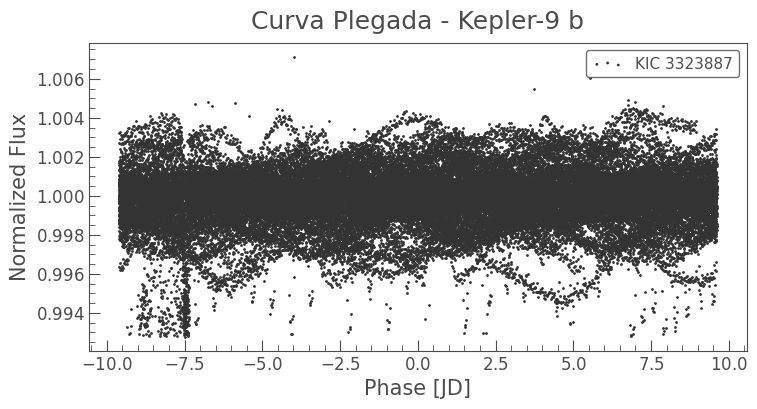

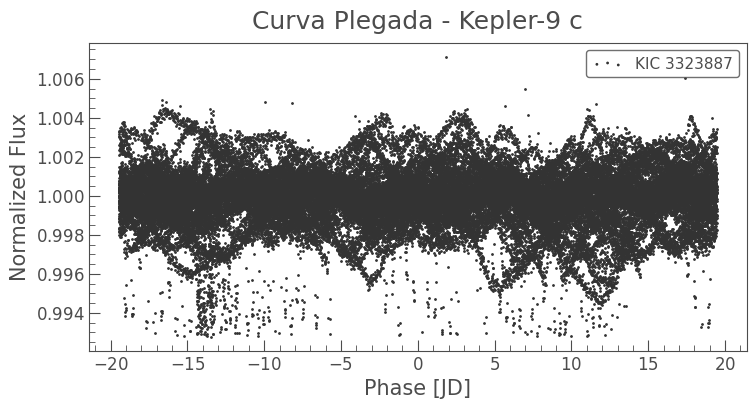

In [10]:
folded_b.scatter(title="Curva Plegada - Kepler-9 b")
folded_c.scatter(title="Curva Plegada - Kepler-9 c")

## 9. Tabla resumen

In [11]:
# --- Tabla resumen ---
df = pd.DataFrame([
    ["Kepler-9 b", P_b, Pb_real, abs(P_b-Pb_real), rpb_earth, Rb_real, abs(rpb_earth-Rb_real), a_b, ab_real, abs(a_b-ab_real), HZ_inner<=a_b<=HZ_outer],
    ["Kepler-9 c", P_c, Pc_real, abs(P_c-Pc_real), rpc_earth, Rc_real, abs(rpc_earth-Rc_real), a_c, ac_real, abs(a_c-ac_real), HZ_inner<=a_c<=HZ_outer]
], columns=["Planeta","P_estim","P_real","ΔP","R_estim","R_real","ΔR","a_estim","a_real","Δa","En_HZ"])
df.set_index("Planeta", inplace=True)
display(df)

,P_estim,P_real,ΔP,R_estim,R_real,ΔR,a_estim,a_real,Δa,En_HZ
Planeta,,,,,,,,,,
Kepler-9 b,19.2242,19.2242,0.0,9.451053488061158,9.4,0.05105348806115728,0.143648,0.143,0.000648,False
Kepler-9 c,38.9100,38.9100,0.0,9.451053488061158,9.2,0.25105348806115835,0.229848,0.225,0.004848,False


## 10. Visualización de arquitectura orbital

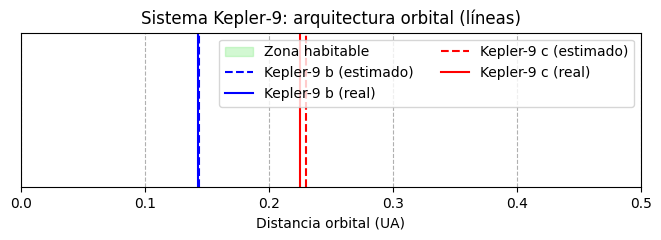

In [12]:
# --- Arquitectura orbital (líneas) ---
fig, ax = plt.subplots(figsize=(8,2))
ax.axvspan(HZ_inner, HZ_outer, color='lightgreen', alpha=0.4, label='Zona habitable')
for planet, col in zip(df.index, ['blue','red']):
    ax.axvline(df.loc[planet,'a_estim'], color=col, linestyle='--', label=f"{planet} (estimado)")
    ax.axvline(df.loc[planet,'a_real'], color=col, label=f"{planet} (real)")
ax.set_xlim(0, 0.5)
ax.set_xlabel("Distancia orbital (UA)")
ax.set_yticks([])
ax.set_title("Sistema Kepler‑9: arquitectura orbital (líneas)")
ax.legend(ncol=2)
plt.grid(axis='x', linestyle='--')
plt.show()

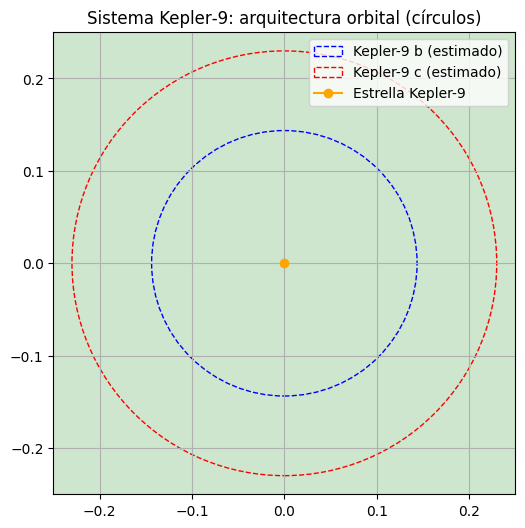

In [13]:
# --- Arquitectura orbital (círculos) ---
fig, ax = plt.subplots(figsize=(6,6))
HZ = plt.Circle((0, 0), HZ_inner, color='green', alpha=0.1)
HZ2 = plt.Circle((0, 0), HZ_outer, color='green', alpha=0.1)
orb_b = plt.Circle((0, 0), a_b, fill=False, color='blue', linestyle='--', label='Kepler-9 b (estimado)')
orb_c = plt.Circle((0, 0), a_c, fill=False, color='red', linestyle='--', label='Kepler-9 c (estimado)')
ax.add_artist(HZ)
ax.add_artist(HZ2)
ax.add_artist(orb_b)
ax.add_artist(orb_c)
ax.plot(0, 0, marker='o', color='orange', label='Estrella Kepler-9')
ax.set_xlim(-0.25, 0.25)
ax.set_ylim(-0.25, 0.25)
ax.set_aspect('equal')
ax.set_title("Sistema Kepler‑9: arquitectura orbital (círculos)")
ax.legend(loc='upper right')
plt.grid()
plt.show()

## 11. Comparación de radios estimados vs reales

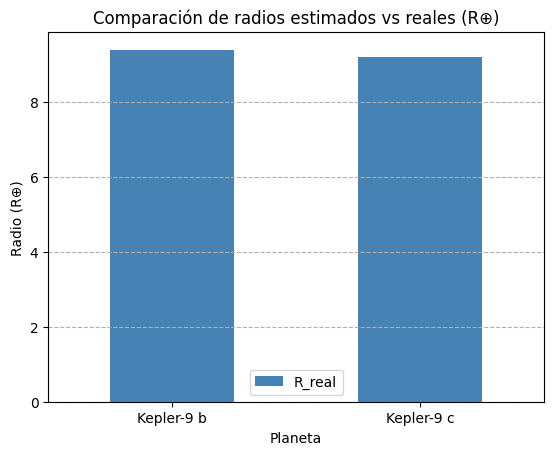

In [14]:
df[['R_estim','R_real']].plot.bar(rot=0, title="Comparación de radios estimados vs reales (R⊕)", ylabel="Radio (R⊕)", color=['steelblue','orange'])
plt.grid(axis='y', linestyle='--')
plt.show()